<a href="https://colab.research.google.com/github/Omotoso526/Exploratory-Data-Analysis-of-Customer-Churn-Dataset/blob/main/Insurance_Charge_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Univariate Analysis**

We are to derive basic insights from this dataset by carrying out the univariate analysis of features. The dataset provides information about the beneficiaries of health insurance of some regions in the United States of America.

In [1]:
import pandas as pd
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
#descriptive statistics ; this excludes the categorical columns like "Sex" and "Region"
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
#The shape of dataaset(row and column)
df.shape

(1338, 7)

In [4]:
#Missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are no null values in the columns.

In [6]:
print(f'age: {df.age.nunique()}')
print(f'sex: {df.age.nunique()}')
print(f'bmi: {df.age.nunique()}')
print(f'children: {df.age.nunique()}')
print(f'smoker: {df.age.nunique()}')
print(f'region: {df.age.nunique()}')
print(f'charges: {df.age.nunique()}')

age: 47
sex: 47
bmi: 47
children: 47
smoker: 47
region: 47
charges: 47


In [7]:
import numpy as np
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [8]:
df.charges.std()

12110.011236694001

In [9]:
from scipy.stats import kurtosis, skew
print(skew(df.charges, bias = False))
print(kurtosis(df.charges, bias = False))

1.5158796580240383
1.6062986532967916


**Exploratory Analysis and Visualization**

Let's explore the data by visualizing the features of the dataset, and exploring the relationship between "charges" and other columns.

In [10]:
#Importing necessary libraries
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Age**

This column tells us about the age of the citizens who are enrolled in the health insurance package. The minimum age is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram of 47 bins and line chart.

In [11]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [12]:
viz = px.histogram(df,
                   x = 'age',
                   marginal = 'box',
                   nbins = 47,
                   title = 'Distribution of age')
viz.update_layout(bargap = 0.2)
viz.show()

This chart visualizes a uniform distribution of age with a few outlier( Ages 18 and 19) having unique counts of 68 and 67 respectively.

**Machine Learning**

Using Machine Learning models, we are creating a system that will estimate or predict the insurance charges of individuals who wants to enroll in the health insurance system using features like age, sex, BMI, children, smoking habits and region of residence.



Body Mass Index (BMI)

This refers to the ratio of weight to the square of height, it is measured in Kg per m square. BMI will be visualizes using histogram and boxplot.

In [13]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [14]:
viz = px.histogram(df,
                   x = 'bmi',
                   marginal = 'box',
                   color_discrete_sequence = ["red"],
                   nbins = 39,
                   title = 'Distribution of bmi')
viz.update_layout(bargap = 0.2)
viz.show()

The distribution of body mass index follows a normal or Gaussian distribution centred around 30, with a few outliers to the right. According to this article <a href="https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/#:~:text=BMI%20ranges&text=below%2018.5%20%E2%80%93%20you're%20in,re%20in%20the%20obese%20range">link</a>, a huge proportion of the benificiaries of this scheme are in the obese weight range.

**Charges**

This column remains the most important column in the dataset as it is the prediction target column. Therefore, we are interested in distinguishing the charges of smokers and non-smokers.

In [15]:
fig = px.histogram(df,
                   x = "charges",
                   marginal = 'box',
                   color = "smoker",
                   color_discrete_sequence= ["green", "grey"],
                   title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.2)
fig.show()

Insights from the above plot:

1) For most customers, the medical charges are under 10,000. A small fraction of customer have higher charges.
2) There is significant difference between the smokers and non-smokers charges. While the median charge for non-smokers is 7,345, the  median charge for non-smokers is 34,500


**Sex vs charges**

We want to check for the relationship between these two columns.

In [16]:
fig = px.histogram(df,
                   x = "charges",
                   marginal = 'box',
                   color = "sex",
                   color_discrete_sequence= ["green", "grey"],
                   title = 'Sex vs Charges')
fig.update_layout(bargap = 0.2)
fig.show()

**Insights**

1) Majority has their charge below 12k, whilst in this range, there are more males than females.

2) A few proportion has charges exceeding 12k, this may be due to diseases, number of children, high BMI, etc.

3) Both males and females have outliers consisting of people paying above 50k as charges.

**Smoker**

Let us visualize the distribution of the smoker column.

In [17]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [18]:
px.histogram(df, x = 'smoker', color = "sex", title = 'Smoker')

It appears that about 20% of the customers reported that they smoke, with males having the higher proportion of smokers.

**Age vs Charges**

This is to show how important 'Age' is in determining the "Charges" of customers.

In [19]:
AvC = px.scatter(df,
                 x = 'age',
                 y = "charges",
                 color = "smoker",
                 opacity = 0.8,
                 hover_data = ["sex"],
                 title = 'Age vs Charges')
AvC.update_traces(marker_size = 5)
AvC.show()

Inferences from the plot

1) There are three clusters above, one filled with non smokers only and with the least charges (below 20k), the second filter consists of smokers and non-smokers with charges in the range of 10k to about 35k. The third cluster consists of mainly smokers and this cluster is characterized by higher charges. This coroborates the popular agenda against smoking due to its negative health impacts.


2) Non smokers with high charges may probably be faced with other health issues including obesity, high blood presssure, etc.

**BMI and Charges**

Let's visualize the relationship between BMI and charges using another scatterplot, using smoker column values to color the points.

In [20]:
BvC = px.scatter(df,
                 x = 'bmi',
                 y = 'charges',
                 color = 'smoker',
                 opacity = 0.8,
                 hover_data = ["sex"],
                 title = "BMI vs Charges"
                 )
BvC.update_traces(marker_size = 5 )
BvC.show()

It appears that there is almost a linear relationship or correlation between BMI and charges for smokers, the higher the BMI of a smoker, the more his charges.

As for non smokers, there seems to be no correlation between their BMIs and charges. People within ages 30 and 45 seems to have higher BMIs among non smokers, this is also almost the same for the smokers.



**Region vs Charges**

In [21]:
fig = px.bar(df, x='region', y='charges', title='Region vs Charges', labels={'Values': 'Count'})
fig.show()

Across all regions, customers from the "southeast" region have the highest total charges. This may be due to an epidermic or high birth rate in the region.

**Children vs Charges**

Using a violin plot, we will examine the relationship between the children of the customers and the charges paid by the customers.

In [22]:
fig = px.violin(df, x='children', y='charges', title='Children vs Charges')
fig.show()

**Correlation**

In machine learning, correlation refers to the statistical measure that quantifies the extent to which two variables change together. It's a measure of the linear relationship between two variables. Correlation values range from -1 to 1, where:

1: Perfect positive correlation - as one variable increases, the other variable also increases proportionally.

0: No correlation - the variables do not have a linear relationship.

-1: Perfect negative correlation - as one variable increases, the other variable decreases proportionally.

In [23]:
#correlation between charges and age
df.charges.corr(df.age)

0.2990081933306476

In [24]:
#correlation between charges and bmi
df.charges.corr(df.bmi)

0.19834096883362895

In [25]:
#correlation between charges and children
df.charges.corr(df.children)

0.06799822684790478

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [26]:
smoker_values = {"no":0, "yes": 1}
smoker_numeric = df.smoker.map(smoker_values)

In [27]:
df.charges.corr(smoker_numeric)

0.787251430498478

To compare the correlation between various numerical columns, pandas provides .corr function.

In [28]:
df.corr()

<ipython-input-28-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


The result above is called **correlation matrix **which can be visualized on a **heatmap**

<ipython-input-29-a46b4796a760>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Matrix')

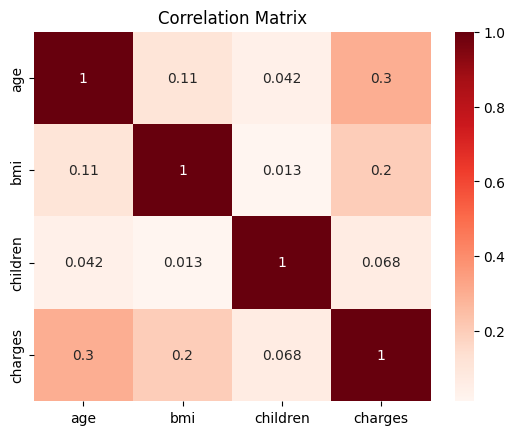

In [29]:
sns.heatmap(df.corr(), cmap = 'Reds', annot = True)
plt.title('Correlation Matrix')

The "smoker" and 'age" columns have the strongest correlation with charges. Let's try to find a way of estimating the value of "charges" using the value of "age" for non smokers. First, let's create a data frame containing just the data for non smokers.

In [30]:
non_smoker_df = df[df.smoker == 'no']

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

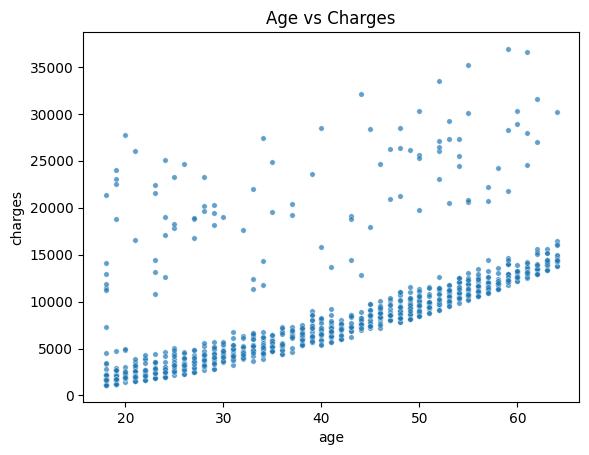

In [31]:
plt.title("Age vs Charges")
sns.scatterplot(data = non_smoker_df, x = 'age', y = "charges", alpha = 0.7, s = 15)

**Modeling**

We will using a simple linear regression model in this project, using the age and bmi columns as the features due to the comparatively high correlation values with the prediction target (charges).

In [32]:
#features
x = df[["age", "bmi"]]

#target
y = df.charges

Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

Training the Model

Now its time to train our model on our training data!



In [35]:
#import linear regression
from sklearn.linear_model import LinearRegression

In [36]:
#instantiate the model
lm = LinearRegression()

Fit lm on the training data.

In [37]:
lm.fit(x_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [38]:
lm.coef_

array([238.32842483, 345.03861116])

**Predicting Test Data**

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [39]:
y_pred = lm.predict(x_test)

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [41]:
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 123413626.90
Mean Absolute Error (MAE): 8918.12
R-squared (R2): 0.12


**Using categorical features for Machine Learning**

**Binary Categories**

<Axes: xlabel='smoker', ylabel='charges'>

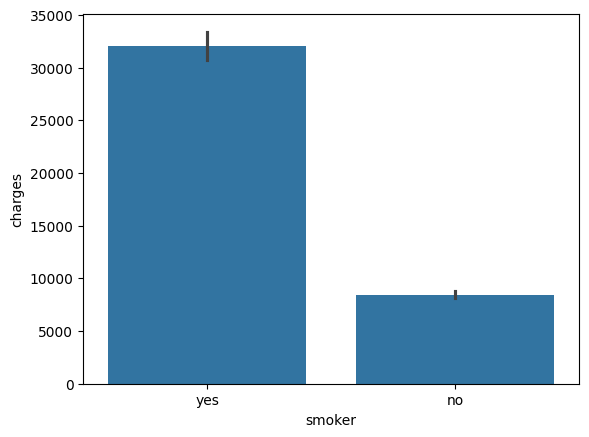

In [42]:
#Let's code the smoker columns in to 0 and 1
sns.barplot(data = df, x = "smoker", y = "charges")

In [43]:
smoker_code = {"no":0, "yes":1}
df["smoker_code"] = df.smoker.map(smoker_code)

In [44]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [45]:
#checking for the correlation between charges and the newly created column
df.charges.corr(df.smoker_code)

0.787251430498478

This indicates a very high correlation

We can now use the "smoker_code" column for linear regression

In [46]:
inputs, target = df[["age", "bmi", "children", "smoker_code"]],df["charges"]

#create and train the model
model = LinearRegression().fit(inputs, target)

#generate predictions
predictions = model.predict(inputs)

#compose loss to evaluate model
mse = mean_squared_error(target, predictions)
mae = mean_absolute_error(target, predictions)
r2 = r2_score(target, predictions)

In [47]:
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 36680455.99
Mean Absolute Error (MAE): 4178.68
R-squared (R2): 0.75


Comparing the mean absolute values and R2 scores of both models, the second model proves better; the model that includes the "smoker_code" column as one of the features. This indicates that this column is of high importance in predicting the charges of customers.

This shows the importance of categorical columns.

Let's try adding the sex column.

<Axes: xlabel='sex', ylabel='charges'>

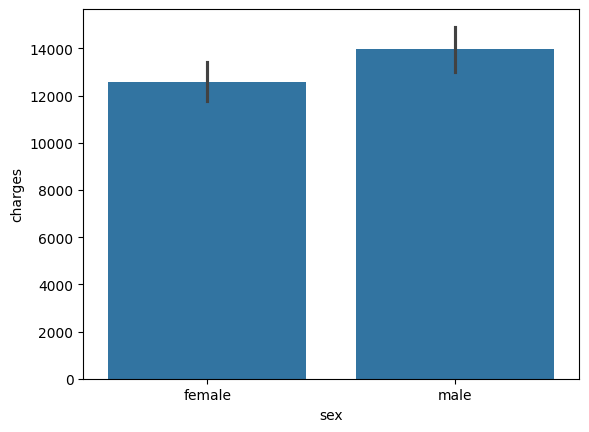

In [48]:
sns.barplot(data= df, x = 'sex', y = 'charges')

From the plot above, male seems to have higher charges than female. This may be due to the fact that we have more male smokers than female among the customers.

In [49]:
sex_code = {"female":0, "male":1}

In [50]:
df["sex_code"] = df.sex.map(sex_code)

In [51]:
#checking the correlation b etween charges and sex_code
df.charges.corr(df.sex_code)

0.057292062202025484

In [52]:
inputs, target = df[["age", "bmi", "children", "smoker_code", "sex_code"]],df["charges"]

#create and train the model
model = LinearRegression().fit(inputs, target)

#generate predictions
predictions = model.predict(inputs)

#compose loss to evaluate model
mse = mean_squared_error(target, predictions)
mae = mean_absolute_error(target, predictions)
r2 = r2_score(target, predictions)

In [53]:
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 36676355.79
Mean Absolute Error (MAE): 4178.66
R-squared (R2): 0.75


There is not much difference as a result of the inclusion of the sex_code column. Therefore, it is not an important faeture.

**One hot encoding**

Since the region column has many categories, we will use one hot encoding

<Axes: xlabel='region', ylabel='charges'>

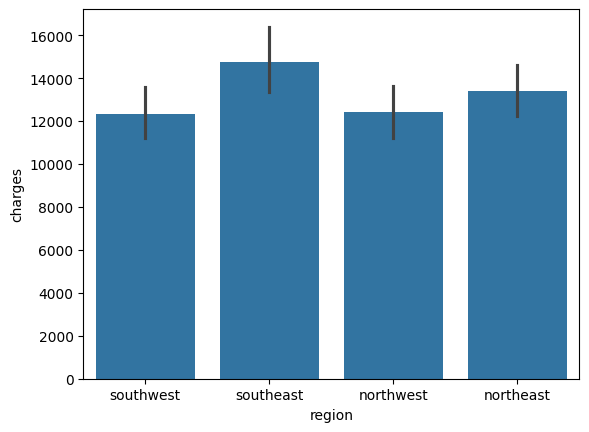

In [54]:
sns.barplot(data = df, x = "region", y = "charges")

In [55]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories

'auto'

In [56]:
one_hot = enc.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [57]:
df[['northeast','northwest','southeast','southwest']] = one_hot

In [58]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [59]:
# we can include the region column
input_cols = ['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']
inputs, target = df[input_cols], df["charges"]

#create and train the model
model = LinearRegression().fit(inputs, target)

#Generate predictions
predictions = model.predict(inputs)

#compose loss to evaluate model
mse = mean_squared_error(target, predictions)
mae = mean_absolute_error(target, predictions)
r2 = r2_score(target, predictions)

In [60]:
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 36501893.01
Mean Absolute Error (MAE): 4170.89
R-squared (R2): 0.75


The model has performed better with the inclusion of the regions as features after OneHotEncoding, experiencing a reduction in the error values.

In [61]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

The coefficient shows the magnitude of contribution of each feature to the linear equation.

The "smoker_code" contributes the highest to the model/equation, with the 'southeast' contributing the least.

This implies that someone that smokes is likely to pay more charges irrespective of his other data in other features.

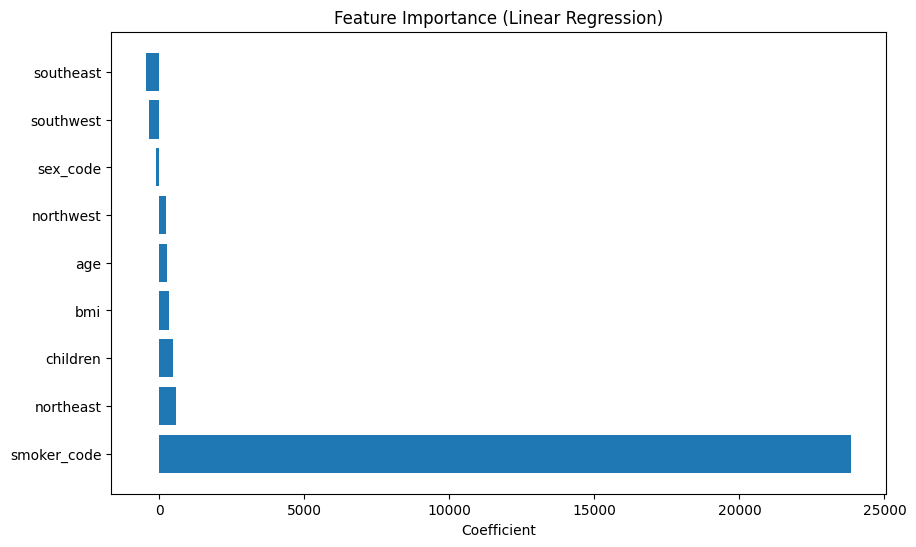

In [62]:
coefficients = model.coef_
feature_names = input_cols

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Feature Importance (Linear Regression)')
plt.show()

In [63]:
#Testing the model
new_customer = [[23,30,2,1,0,0,1,0,0]]

In [64]:
model.predict([[23,30,2,1,0,0,1,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([28591.5328733])

The customer with the above data will pay a charge of 28,591